In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from sklearn.model_selection import KFold


In [ ]:
dataset_path = '/content/drive/MyDrive/Data-Science-Projects/Facial-Emotion-andBody-Language/Datasets/Master-Dataset-Body/Master-Dataset'
batch_size = 32
img_size = (224, 224)
epochs = 10

data_gen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

train_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 2325 images belonging to 2 classes.
Found 581 images belonging to 2 classes.


In [ ]:
def create_model():
    base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                                   include_top=False,
                                                   weights='imagenet')
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Found 2325 images belonging to 2 classes.
Found 581 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


73/73 ━━━━━━━━━━━━━━━━━━━━ 625s 8s/step - accuracy: 0.7348 - loss: 0.5701 - val_accuracy: 0.9742 - val_loss: 0.2364
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.8740 - loss: 0.3589 - val_accuracy: 0.9759 - val_loss: 0.1739
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.9027 - loss: 0.2731 - val_accuracy: 0.9845 - val_loss: 0.1462
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9200 - loss: 0.2352 - val_accuracy: 0.9621 - val_loss: 0.1586
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9160 - loss: 0.2326 - val_accuracy: 0.9845 - val_loss: 0.1197
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.9264 - loss: 0.2199 - val_accuracy: 0.9880 - val_loss: 0.1128
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.9270 - loss: 0.2018 - val_accuracy: 0.9914 - val_loss: 0.0964
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.9302 - loss: 0.1904 - val_accuracy: 0.9742 - val_loss: 0.

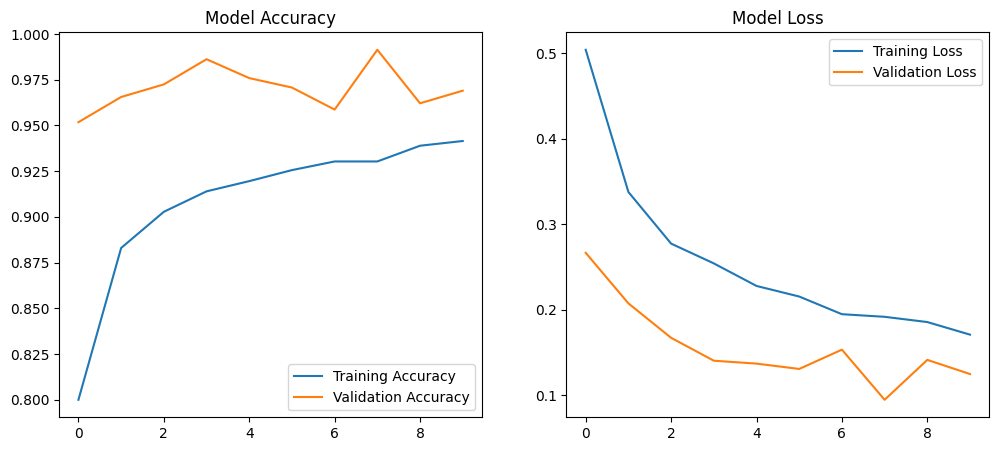

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
all_scores = []

for train_index, val_index in kfold.split(train_data):
    model = create_model()

    history = model.fit(train_data, epochs=epochs, validation_data=validation_data)

    accuracy = history.history['val_accuracy'][-1]
    if accuracy < 0.7:
        model = create_model()
        model.layers[0].trainable = True
        for layer in model.layers[0].layers[:100]: base model
            layer.trainable = False

        model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
        history = model.fit(train_data, epochs=epochs, validation_data=validation_data)

    all_scores.append(accuracy)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
average_accuracy = np.mean(all_scores) * 100
print(f"Average K-Fold Accuracy: {average_accuracy:.2f}%")

Average K-Fold Accuracy: 97.93%


In [ ]:
test_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 581 images belonging to 2 classes.
19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9610 - loss: 0.1338
Test Accuracy: 96.90%


In [ ]:
test_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 581 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9592 - loss: 0.1345
Test Accuracy: 96.90%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

predictions = model.predict(test_data)
predicted_classes = (predictions > 0.5).astype("int32").flatten()
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step
              precision    recall  f1-score   support

      Active       0.78      0.75      0.77       450
        Lazy       0.25      0.28      0.26       131

    accuracy                           0.65       581
   macro avg       0.52      0.52      0.52       581
weighted avg       0.66      0.65      0.65       581



In [ ]:
  model.save('/content/drive/MyDrive/Data-Science-Projects/Facial-Emotion-andBody-Language/Models/body_pose_recognition_model.h5')